In [2]:
from IPython.display import display, HTML
p="Gradient Norm:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

Length of x_data: torch.Size([200, 1])
Length of y_data: torch.Size([200, 1])
Number of parameters in Model 1: 571

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.5454],
        [ 0.8115],
        [ 0.4887],
        [-0.4212],
        [-0.3294]])
hiddenlayer1.bias 	 tensor([ 0.4145, -0.2613,  0.0719,  0.3492, -0.2284])
hiddenlayer2.weight 	 tensor([[-0.2875,  0.0779, -0.0582, -0.2151, -0.3144],
        [-0.4011, -0.2447, -0.0969,  0.1514, -0.0432],
        [-0.1954, -0.4366, -0.1811, -0.3300,  0.2568],
        [ 0.2901, -0.4136, -0.3652,  0.0678,  0.3223],
        [ 0.4018, -0.4209, -0.2733,  0.2731,  0.2015],
        [-0.0497,  0.3021, -0.3571, -0.1335,  0.3011],
        [ 0.0118, -0.1008,  0.0784, -0.2646, -0.3678],
        [-0.2623,  0.3621,  0.1225, -0.2303,  0.0006],
        [-0.3994, -0.0665, -0.0331, -0.0732, -0.1514],
        [ 0.0679,  0.1771, -0.2633, -0.0279,  0.0987]])
hiddenlayer2.bias 	 tensor([-0.2840, -0.2928,  0.2519,  0.0645, -0.3437,  0.10

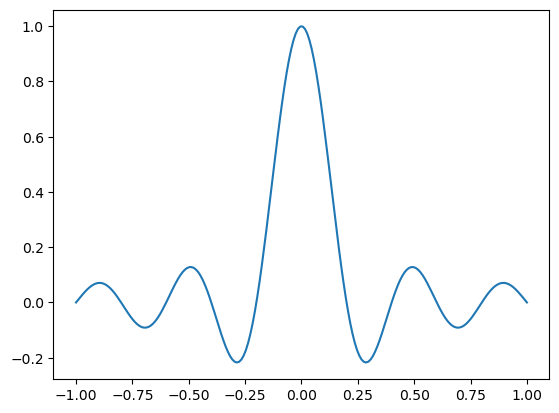

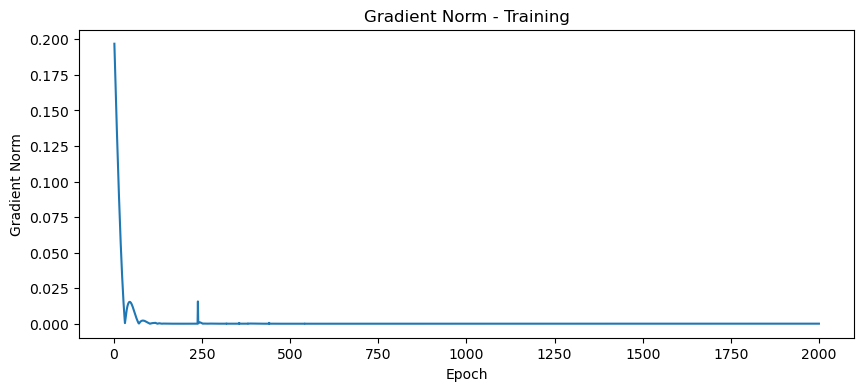

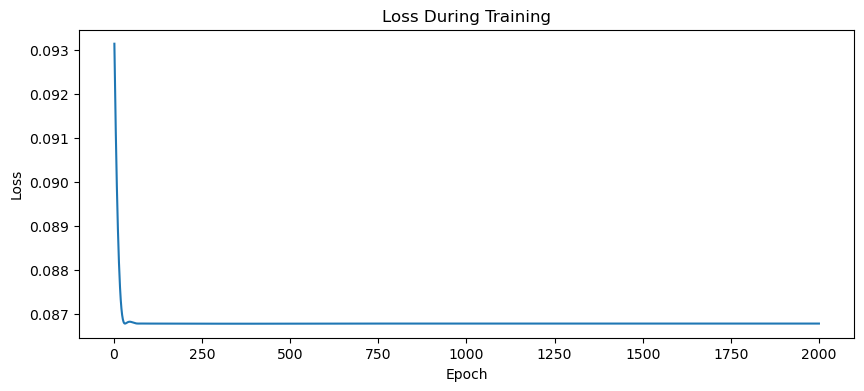

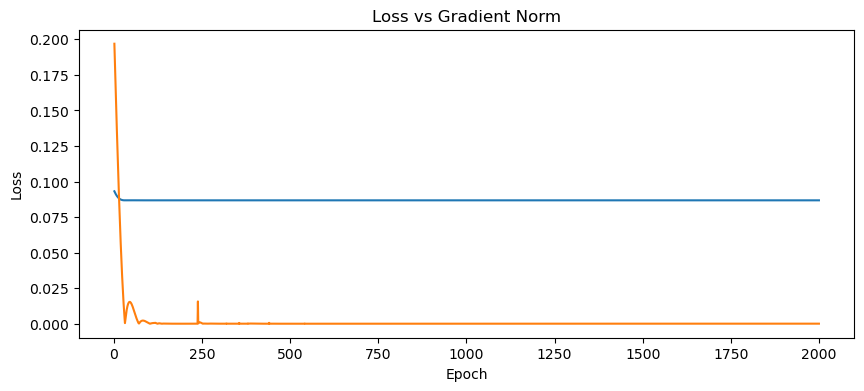

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Function 1  ###
x_data = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)

# Choosing sin(x) as a nonlinear function
y_data = (np.sin(5 * np.pi * x_data)) / (5 * np.pi * x_data)

print('Length of x_data:', x_data.shape)
print('Length of y_data:', y_data.shape)
plt.plot(x_data, y_data)

# Defining the model
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        # Hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # Output layer
        self.output = nn.Linear(5, 1)

    # Activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)
        return x

# Initializing the model
model_1 = Model1()

optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001, weight_decay=0.0001)
# Finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()

summation = []

for j in model_1.parameters():
    summation.append(torch.numel(j))

print('Number of parameters in Model 1:', np.sum(summation), )

# Getting weights & bias
print("\nModel 1 weight and bias before training\n")

for param in model_1.state_dict():
    print(param, "\t", model_1.state_dict()[param])


def model_train(model, x, y):
    max_epoch = 2000
    epoch_arr, loss_arr = [], []
    not_converged = True
    epoch = 0
    grad_arr = []
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_function(prediction, y)
        optimizer.zero_grad()  # Clear gradients for next epoch
        loss.backward()  # Compute gradients using backpropagation
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5

        grad_arr.append(grad_norm)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        if epoch == max_epoch:
            print("Max Epoch Reached")
            not_converged = False

        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction, grad_arr


optimizer = torch.optim.Adam(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()  # Mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = model_train(model_1, x_data, y_data)

plt.figure(figsize=(10, 4))
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
